<a href="https://colab.research.google.com/github/Marcooos05/Algo-Trading-Journal/blob/main/GBPUSD4HR_BollingerBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load Forex Price Data
df = pd.read_csv('GBPUSD4HR.csv')
df

,Column1,Column2,Open,High,Low,Close,Volume
0,19/5/2008,12:00:00 AM,1.95600,1.95650,1.95574,1.95620,628
1,19/5/2008,4:00:00 AM,1.95620,1.95860,1.95390,1.95575,20963
2,19/5/2008,8:00:00 AM,1.95575,1.96230,1.95525,1.95555,26479
3,19/5/2008,12:00:00 PM,1.95555,1.95560,1.94525,1.94705,27216
4,19/5/2008,4:00:00 PM,1.94700,1.94880,1.94630,1.94775,10589
...,...,...,...,...,...,...,...
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496


In [5]:
# Calculating 20 Ticks (5 days) moving average
df['20_MA_Close'] = df['Close'].rolling(window=20).mean()
# calculating 20 Ticks (5 days) rolling standard devtaion
df['20_std_Close'] = df['Close'].rolling(window=20).std()

In [6]:
df.tail()


,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503,1.272337,0.001897
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038,1.272650,0.002150
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705,1.272829,0.002361
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496,1.273107,0.002533
25845,28/5/2024,12:00:00 AM,1.27718,1.27829,1.27702,1.27808,8066,1.273410,0.002749


In [7]:
# Using the standard deviation, calculate the lows and highs of the Bollinger Bands
df['Bollinger_Low'] = df['20_MA_Close'] - 2*df['20_std_Close']
df['Bollinger_High'] = df['20_MA_Close'] + 2*df['20_std_Close']

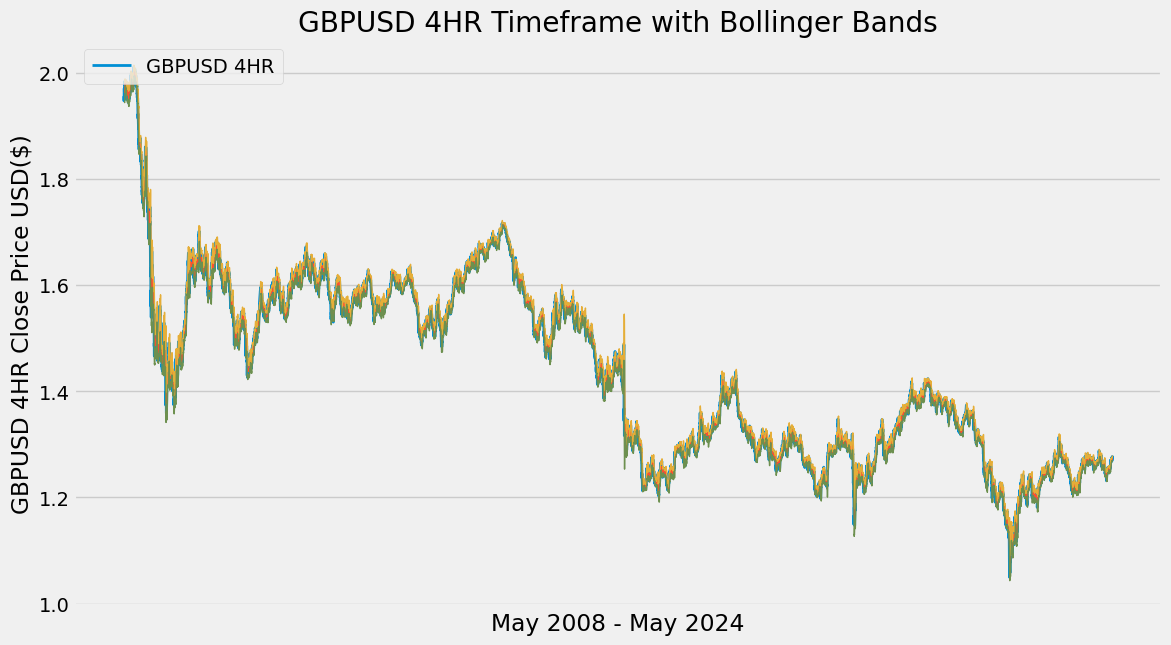

In [8]:
# Visualise the full dataset
plt.figure(figsize = (12.5, 7))
plt.plot(df['Close'], label = 'GBPUSD 4HR', linewidth = 2)
plt.plot(df['20_MA_Close'], linewidth = 1)
plt.plot(df['Bollinger_High'], linewidth = 1)
plt.plot(df['Bollinger_Low'], linewidth = 1)
plt.title('GBPUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('GBPUSD 4HR Close Price USD($)')
plt.xlabel('May 2008 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [9]:
data = df.tail(653)
data

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High
25193,1/1/2024,8:00:00 PM,1.27184,1.27347,1.27155,1.27274,3288,1.275606,0.003232,1.269143,1.282070
25194,2/1/2024,12:00:00 AM,1.27275,1.27331,1.27095,1.27181,15511,1.275568,0.003274,1.269019,1.282117
25195,2/1/2024,4:00:00 AM,1.27180,1.27438,1.27107,1.27320,16735,1.275609,0.003238,1.269133,1.282084
25196,2/1/2024,8:00:00 AM,1.27324,1.27596,1.26538,1.26621,27878,1.275291,0.003813,1.267666,1.282916
25197,2/1/2024,12:00:00 PM,1.26623,1.26626,1.26147,1.26248,36151,1.274741,0.004763,1.265216,1.284267
...,...,...,...,...,...,...,...,...,...,...,...
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503,1.272337,0.001897,1.268544,1.276130
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038,1.272650,0.002150,1.268350,1.276950
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705,1.272829,0.002361,1.268108,1.277551
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496,1.273107,0.002533,1.268041,1.278172


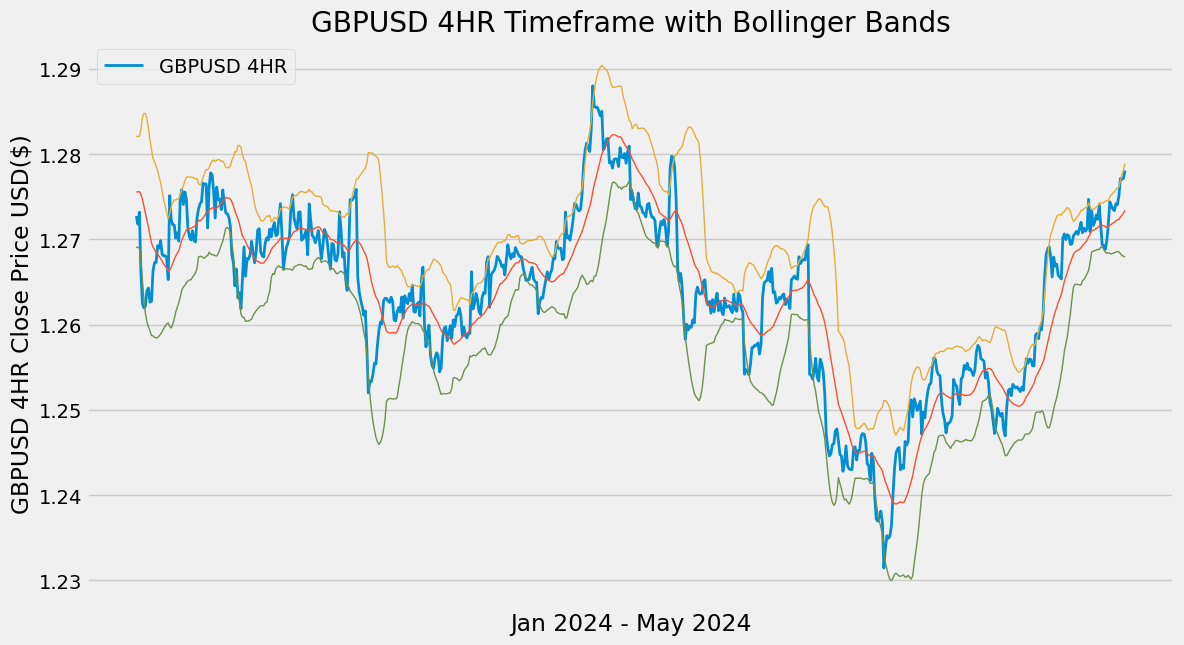

In [10]:
# Narrow down dataset to only look at 2024 data
plt.figure(figsize = (12.5, 7))
plt.plot(data['Close'], label = 'GBPUSD 4HR', linewidth = 2)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.title('GBPUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('GBPUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [11]:
#Create a function for buy and sell signal
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  sigCloseTrade = []
  profit = {'Entry':0, 'Pips':[]}
  trade = 0 #variable to signify if the state of the EURUSD trade

  for n in range(len(data)):
    if data['Close'].iloc[n] <= data['Bollinger_Low'].iloc[n] and trade == 0: # Signal to close a short trade
      sigCloseTrade.append(data['Bollinger_Low'].iloc[n])
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      if profit['Entry'] != 0:
        profit['Pips'].append(10000*(profit['Entry'] - data['Close'].iloc[n]))
      trade = 1
    elif data['Close'].iloc[n] > data['Bollinger_Low'].iloc[n] and trade == 1: # Signal to enter a long trade
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(data['Close'].iloc[n])
      sigPriceSell.append(np.nan)
      profit['Entry'] = data['Close'].iloc[n]
      trade = 2
    elif data['Close'].iloc[n] >= data['Bollinger_High'].iloc[n] and trade == 2: # Signal to close a long trade
      sigCloseTrade.append(data['Bollinger_High'].iloc[n])
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      profit['Pips'].append(10000*(data['Close'].iloc[n] - profit['Entry']))
      trade = 3
    elif data['Close'].iloc[n] < data['Bollinger_High'].iloc[n] and trade == 3: # Signal to enter a short trade
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['Close'].iloc[n])
      profit['Entry'] = data['Close'].iloc[n]
      trade = 0
    else:
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell, sigCloseTrade, profit)

In [12]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data['Close_Signal'] = buy_sell_arr[2]
stats = buy_sell_arr[3]
print(stats['Pips'])
print(sum(stats['Pips']))
data

[129.50000000000017, 41.20000000000124, 76.80000000000132, 40.89999999999927, 37.10000000000102, 71.10000000000171, 65.20000000000081, 225.6999999999998, 117.89999999999966, 26.800000000000157, 72.3000000000007, -33.40000000000121, 44.599999999999085, -56.400000000000894, 47.399999999999665, 178.00000000000037, 79.2000000000015, 129.999999999999, 16.099999999998893, 50.499999999999986, 76.6]
1437.1000000000024


<ipython-input-12-6a49c9abd984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal_Price'] = buy_sell_arr[0]
<ipython-input-12-6a49c9abd984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signal_Price'] = buy_sell_arr[1]
<ipython-input-12-6a49c9abd984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High,Buy_Signal_Price,Sell_Signal_Price,Close_Signal
25193,1/1/2024,8:00:00 PM,1.27184,1.27347,1.27155,1.27274,3288,1.275606,0.003232,1.269143,1.282070,NaN,NaN,NaN
25194,2/1/2024,12:00:00 AM,1.27275,1.27331,1.27095,1.27181,15511,1.275568,0.003274,1.269019,1.282117,NaN,NaN,NaN
25195,2/1/2024,4:00:00 AM,1.27180,1.27438,1.27107,1.27320,16735,1.275609,0.003238,1.269133,1.282084,NaN,NaN,NaN
25196,2/1/2024,8:00:00 AM,1.27324,1.27596,1.26538,1.26621,27878,1.275291,0.003813,1.267666,1.282916,NaN,NaN,1.267666
25197,2/1/2024,12:00:00 PM,1.26623,1.26626,1.26147,1.26248,36151,1.274741,0.004763,1.265216,1.284267,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503,1.272337,0.001897,1.268544,1.276130,NaN,NaN,NaN
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038,1.272650,0.002150,1.268350,1.276950,NaN,NaN,NaN
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705,1.272829,0.002361,1.268108,1.277551,NaN,NaN,NaN
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496,1.273107,0.002533,1.268041,1.278172,NaN,NaN,NaN


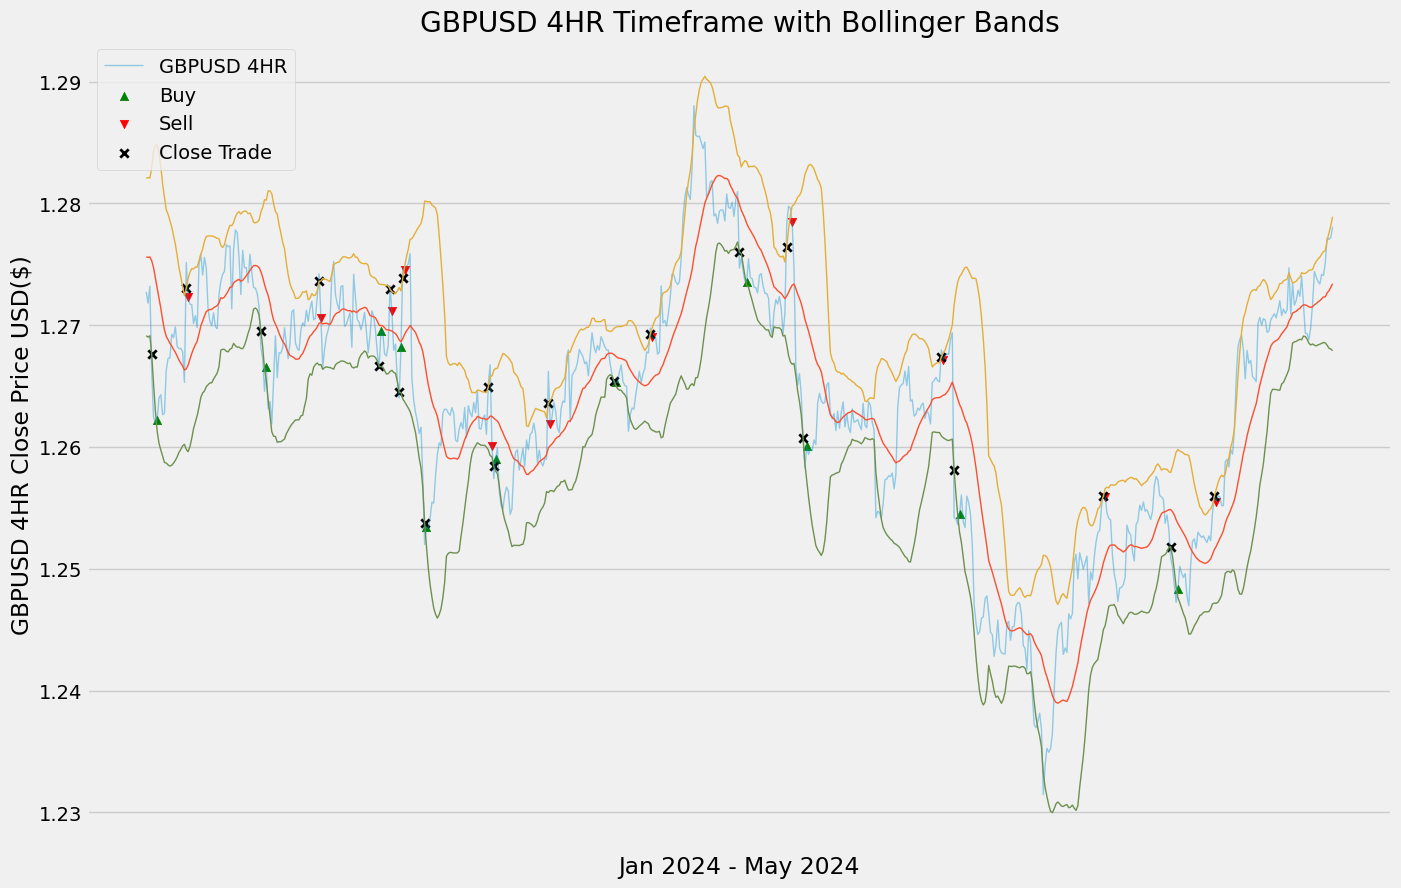

In [13]:
# Visualize Bollinger Band with Close price and Buy & Sell Signals
plt.figure(figsize = (15, 10))
plt.plot(data['Close'], label = 'GBPUSD 4HR', linewidth = 1, alpha = 0.4)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.scatter(data.index, data['Close_Signal'], label = 'Close Trade', marker = 'x', color = 'black', linewidth = 2)
plt.title('GBPUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('GBPUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [14]:
# Using 1.75 standard deviation, calculate the lows and highs of the Bollinger Bands - more sensitive than 2std Bollinger Bands
df['Bollinger_Low'] = df['20_MA_Close'] - 1.75*df['20_std_Close']
df['Bollinger_High'] = df['20_MA_Close'] + 1.75*df['20_std_Close']

In [15]:
data = df.tail(653)
data

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High
25193,1/1/2024,8:00:00 PM,1.27184,1.27347,1.27155,1.27274,3288,1.275606,0.003232,1.269951,1.281262
25194,2/1/2024,12:00:00 AM,1.27275,1.27331,1.27095,1.27181,15511,1.275568,0.003274,1.269838,1.281298
25195,2/1/2024,4:00:00 AM,1.27180,1.27438,1.27107,1.27320,16735,1.275609,0.003238,1.269943,1.281274
25196,2/1/2024,8:00:00 AM,1.27324,1.27596,1.26538,1.26621,27878,1.275291,0.003813,1.268619,1.281963
25197,2/1/2024,12:00:00 PM,1.26623,1.26626,1.26147,1.26248,36151,1.274741,0.004763,1.266407,1.283076
...,...,...,...,...,...,...,...,...,...,...,...
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503,1.272337,0.001897,1.269018,1.275656
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038,1.272650,0.002150,1.268887,1.276413
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705,1.272829,0.002361,1.268698,1.276961
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496,1.273107,0.002533,1.268674,1.277539


In [16]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data['Close_Signal'] = buy_sell_arr[2]
stats = buy_sell_arr[3]
print(stats['Pips'])
print(sum(stats['Pips']))
data

[111.30000000000084, 41.20000000000124, 76.80000000000132, 40.800000000000836, 59.899999999999395, 47.699999999999406, 40.800000000000836, 57.300000000000125, 65.20000000000081, 174.29999999999833, 113.19999999999996, 41.29999999999967, 72.3000000000007, -40.99999999999993, 25.100000000000122, -69.60000000000078, 28.200000000000447, 117.50000000000149, 19.500000000001183, 129.999999999999, -39.29999999999989, 2.9999999999996696, 58.30000000000002, -138.7000000000005, 78.89999999999952]
1114.0000000000036


<ipython-input-16-6a49c9abd984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal_Price'] = buy_sell_arr[0]
<ipython-input-16-6a49c9abd984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signal_Price'] = buy_sell_arr[1]
<ipython-input-16-6a49c9abd984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High,Buy_Signal_Price,Sell_Signal_Price,Close_Signal
25193,1/1/2024,8:00:00 PM,1.27184,1.27347,1.27155,1.27274,3288,1.275606,0.003232,1.269951,1.281262,NaN,NaN,NaN
25194,2/1/2024,12:00:00 AM,1.27275,1.27331,1.27095,1.27181,15511,1.275568,0.003274,1.269838,1.281298,NaN,NaN,NaN
25195,2/1/2024,4:00:00 AM,1.27180,1.27438,1.27107,1.27320,16735,1.275609,0.003238,1.269943,1.281274,NaN,NaN,NaN
25196,2/1/2024,8:00:00 AM,1.27324,1.27596,1.26538,1.26621,27878,1.275291,0.003813,1.268619,1.281963,NaN,NaN,1.268619
25197,2/1/2024,12:00:00 PM,1.26623,1.26626,1.26147,1.26248,36151,1.274741,0.004763,1.266407,1.283076,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25841,27/5/2024,8:00:00 AM,1.27412,1.27572,1.27337,1.27514,6503,1.272337,0.001897,1.269018,1.275656,NaN,NaN,NaN
25842,27/5/2024,12:00:00 PM,1.27514,1.27774,1.27434,1.27718,15038,1.272650,0.002150,1.268887,1.276413,NaN,NaN,1.276413
25843,27/5/2024,4:00:00 PM,1.27719,1.27737,1.27670,1.27705,12705,1.272829,0.002361,1.268698,1.276961,NaN,NaN,NaN
25844,27/5/2024,8:00:00 PM,1.27705,1.27720,1.27657,1.27718,5496,1.273107,0.002533,1.268674,1.277539,NaN,1.27718,NaN


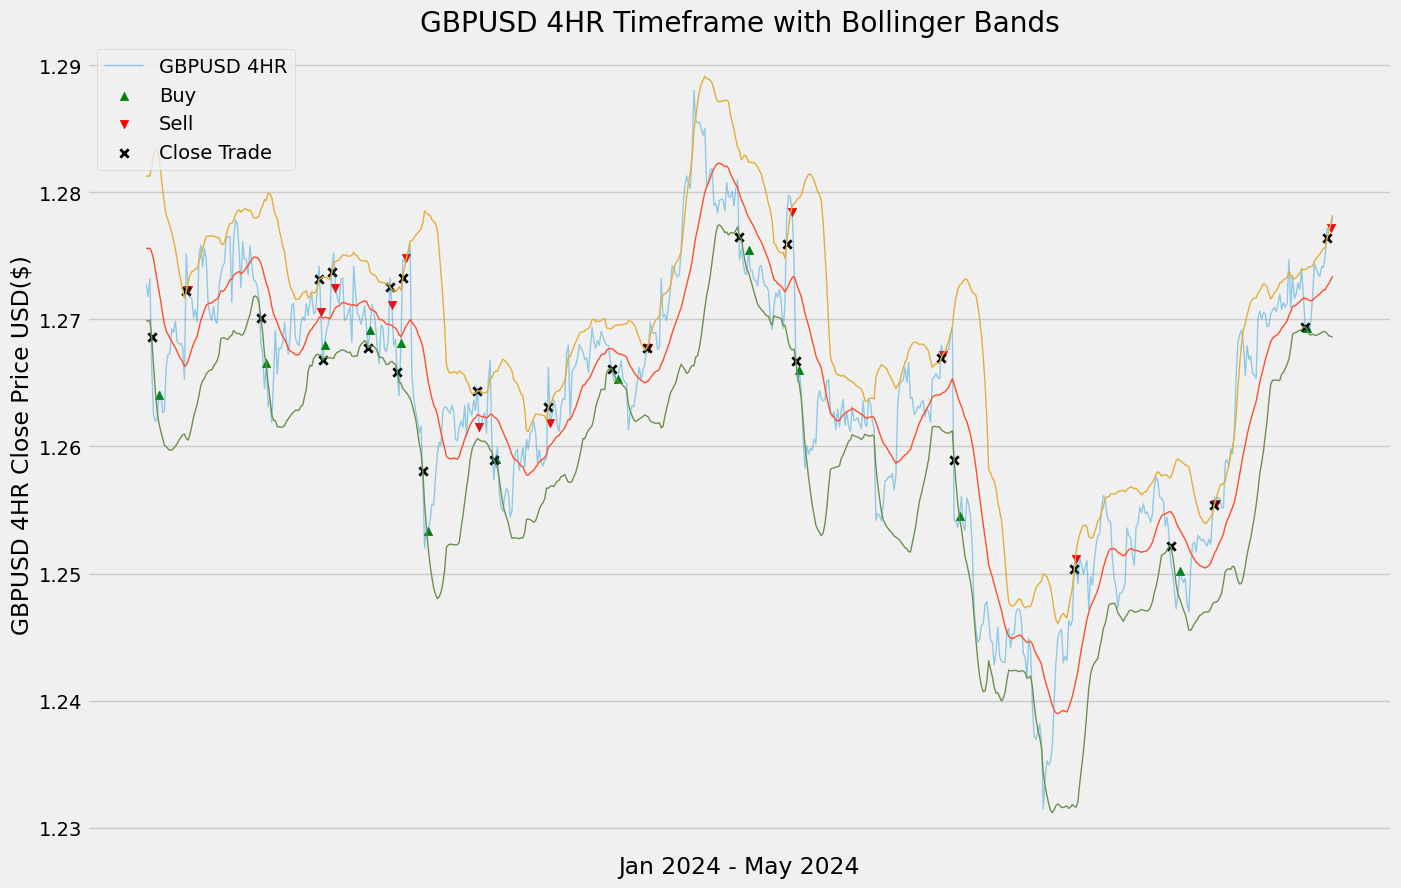

In [17]:
# Visualize Bollinger Band with Close price and Buy & Sell Signals
plt.figure(figsize = (15, 10))
plt.plot(data['Close'], label = 'GBPUSD 4HR', linewidth = 1, alpha = 0.4)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.scatter(data.index, data['Close_Signal'], label = 'Close Trade', marker = 'x', color = 'black', linewidth = 2)
plt.title('GBPUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('GBPUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()